# Group 4
## Hai Huang, Kuai Yu, Jiahua Ma
## How to become a top PUBG player

# PUBG
### PlayerUnknown's Battlegrounds (PUBG) is an online multiplayer battle royale game
### Which the last man survive win the game

# Our goal
### Our goal is to analysis the top players and rest of the players, and trying to help players become top players

# The Data
### Get it from Kaggle Dataset
### webpage: https://www.kaggle.com/skihikingkevin/pubg-match-deaths

# Design
## we use jupyter notebook and python 3.7 to do the most of the code
## The visualization package we use are plotly seaborn and matplotlib

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

# Data concat
## Each csv file is around 2 GB, and agg_match file contain match information
## kill_match files contain information about players'death placement, killed by information

In [2]:
agg_final = pd.concat([pd.read_csv('agg_match_stats_0.csv'),
                      pd.read_csv('agg_match_stats_1.csv')], ignore_index = True)

In [3]:
kill_final = pd.concat([pd.read_csv('kill_match_stats_final_0.csv'),
                      pd.read_csv('kill_match_stats_final_1.csv')], ignore_index = True)

In [4]:
#Drop nan data
agg_final = agg_final.dropna()
kill_final = kill_final.dropna()

# Sneak Peak of two datasets

In [5]:
agg_final.head()

date  game_size  \
0  2017-11-26T20:59:40+0000         37   
1  2017-11-26T20:59:40+0000         37   
2  2017-11-26T20:59:40+0000         37   
3  2017-11-26T20:59:40+0000         37   
4  2017-11-26T20:59:40+0000         37   

                                            match_id match_mode  party_size  \
0  2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp           2   
1  2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp           2   
2  2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp           2   
3  2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp           2   
4  2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...        tpp           2   

   player_assists  player_dbno  player_dist_ride  player_dist_walk  \
0               0            1        2870.72400       1784.847780   
1               0            1        2938.40723       1756.079710   
2               0            0           0.00000        224.157562   
3               0            0           0.00000         92.935150   
4               0            0        2619.07739       2510.447000   

   player_dmg  player_kills player_name  player_survive_time  team_id  \
0         117             1    SnuffIes             1106.320        4   
1         127             1      Ozon3r             1106.315        4   
2          67             0      bovize              235.558        5   
3           0             0     sbahn87              197.553        5   
4         175             2   GeminiZZZ             1537.495       14   

   team_placement  
0              18  
1              18  
2              33  
3              33  
4              11

In [6]:
kill_final.head()

killed_by       killer_name  killer_placement  killer_position_x  \
0       Grenade   KrazyPortuguese               5.0          657725.10   
1        SCAR-L  nide2Bxiaojiejie              31.0           93091.37   
2          S686          Ascholes              43.0          366921.40   
3  Down and Out        Weirdo7777               9.0          472014.20   
4          M416         Solayuki1               9.0          473357.80   

   killer_position_y      map  \
0           146275.2  MIRAMAR   
1           722236.4  MIRAMAR   
2           421623.9  MIRAMAR   
3           313274.8  MIRAMAR   
4           318340.5  MIRAMAR   

                                            match_id  time      victim_name  \
0  2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...   823  KrazyPortuguese   
1  2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...   194      X3evolution   
2  2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...   103          CtrlZee   
3  2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...  1018        BlackDpre   
4  2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...  1018            Vjolt   

   victim_placement  victim_position_x  victim_position_y  
0               5.0          657725.10           146275.2  
1              33.0           92238.68           723375.1  
2              46.0          367304.50           421216.1  
3              13.0          476645.90           316758.4  
4              13.0          473588.50           318418.8

# Column features and shapes for both datasets

In [7]:
agg_final.columns

Index(['date', 'game_size', 'match_id', 'match_mode', 'party_size',
       'player_assists', 'player_dbno', 'player_dist_ride', 'player_dist_walk',
       'player_dmg', 'player_kills', 'player_name', 'player_survive_time',
       'team_id', 'team_placement'],
      dtype='object')

In [8]:
kill_final.columns

Index(['killed_by', 'killer_name', 'killer_placement', 'killer_position_x',
       'killer_position_y', 'map', 'match_id', 'time', 'victim_name',
       'victim_placement', 'victim_position_x', 'victim_position_y'],
      dtype='object')

In [9]:
agg_final.shape

(27653247, 15)

In [10]:
kill_final.shape

(24217596, 12)

# Data Preprocess:
## Match id is the only feature which are in both datasets

## and there are at most 100 same match id in the datasets

## we have to group data by match id and some features we define the data such as party size and map

# Subset of data
## find each party size's match id
## find each map's match id

In [11]:
solo_matches = agg_final.loc[agg_final['party_size'] == 1,'match_id'].drop_duplicates()
duo_matches = agg_final.loc[agg_final['party_size'] == 2,'match_id'].drop_duplicates()
squad_matches = agg_final.loc[agg_final['party_size'] == 4,'match_id'].drop_duplicates()

In [12]:
er_matches = kill_final.loc[kill_final['map'] == 'ERANGEL','match_id'].drop_duplicates()
mr_matches = kill_final.loc[kill_final['map'] == 'MIRAMAR','match_id'].drop_duplicates()

# Match the match id from two dataset and create subsets of data 
## Here we have two maps of solo, duo and squad subsets of data

In [13]:
er_agg = agg_final[agg_final['match_id'].isin(er_matches.values)]
top_solo_era = er_agg[(er_agg['party_size'] == 1) & (er_agg['team_placement'] < 6)]
top_duo_era = er_agg[(er_agg['party_size'] == 2) & (er_agg['team_placement'] < 6)]
top_squad_era = er_agg[(er_agg['party_size'] == 4) & (er_agg['team_placement'] < 6)]

rest_solo_era = er_agg[(er_agg['party_size'] == 1) & (er_agg['team_placement'] > 6)]
rest_duo_era = er_agg[(er_agg['party_size'] == 2) & (er_agg['team_placement'] > 6)]
rest_squad_era = er_agg[(er_agg['party_size'] == 4) & (er_agg['team_placement'] > 6)]

In [14]:
mr_agg = agg_final[agg_final['match_id'].isin(mr_matches.values)]
top_solo_mir = mr_agg[(mr_agg['party_size'] == 1) & (mr_agg['team_placement'] < 6)]
top_duo_mir = mr_agg[(mr_agg['party_size'] == 2) & (mr_agg['team_placement'] < 6)]
top_squad_mir = mr_agg[(mr_agg['party_size'] == 4) & (mr_agg['team_placement'] < 6)]

rest_solo_mir = mr_agg[(mr_agg['party_size'] == 1) & (mr_agg['team_placement'] > 6)]
rest_duo_mir = mr_agg[(mr_agg['party_size'] == 2) & (mr_agg['team_placement'] > 6)]
rest_squad_mir = mr_agg[(mr_agg['party_size'] == 4) & (mr_agg['team_placement'] > 6)]

# Number of solo duo squad matches in two different maps

In [15]:
print('Number of solo queue matches: %i' % len(solo_matches))
solo_deaths = kill_final[kill_final['match_id'].isin(solo_matches.values)]
deaths_solo_er = solo_deaths[solo_deaths['map'] == 'ERANGEL']
deaths_solo_mr = solo_deaths[solo_deaths['map'] == 'MIRAMAR']
print('  Number of Erangel solo matches: %i' % len(deaths_solo_er.groupby('match_id').first()))
print('  Number of Miramar solo matches: %i' % len(deaths_solo_mr.groupby('match_id').first()))

Number of solo queue matches: 62702
  Number of Erangel solo matches: 51548
  Number of Miramar solo matches: 10090


In [16]:
print('Number of duo queue matches: %i' % len(duo_matches))
duo_deaths = kill_final[kill_final['match_id'].isin(duo_matches.values)]
deaths_duo_er = duo_deaths[duo_deaths['map'] == 'ERANGEL']
deaths_duo_mr = duo_deaths[duo_deaths['map'] == 'MIRAMAR']
print('  Number of Erangel duo matches: %i' % len(deaths_duo_er.groupby('match_id').first()))
print('  Number of Miramar duo matches: %i' % len(deaths_duo_mr.groupby('match_id').first()))

Number of duo queue matches: 95727
  Number of Erangel duo matches: 76717
  Number of Miramar duo matches: 16569


In [17]:
print('Number of squad queue matches: %i' % len(squad_matches))
squad_deaths = kill_final[kill_final['match_id'].isin(squad_matches.values)]
deaths_squad_er = squad_deaths[squad_deaths['map'] == 'ERANGEL']
deaths_squad_mr = squad_deaths[squad_deaths['map'] == 'MIRAMAR']
print('  Number of Erangel squad matches: %i' % len(deaths_squad_er.groupby('match_id').first()))
print('  Number of Miramar squad matches: %i' % len(deaths_squad_mr.groupby('match_id').first()))

Number of squad queue matches: 141555
  Number of Erangel squad matches: 109757
  Number of Miramar squad matches: 28460


In [18]:
import gc
gc.collect()

7

In [19]:
#top 5 erangle stats
#top_solo_era = era.loc[(era['party_size'] ==1) & (era['team_placement'] < 6)]
#top_duo_era = era.loc[(era['party_size'] ==2) & (era['team_placement'] < 6)]
#top_squad_era = era.loc[(era['party_size'] ==4) & (era['team_placement'] < 6)]

#top 5 solo erangle stats
topsolokill_era = top_solo_era['player_kills'].mean()

topsolodbno_era = top_solo_era['player_dbno'].mean()

topsolodmg_era = top_solo_era['player_dmg'].mean()

topsolosurvive_era = top_solo_era['player_survive_time'].mean() / 60

#top 5 duo erangle stats
topduokill_era = top_duo_era['player_kills'].mean()

topduodbno_era = top_duo_era['player_dbno'].mean()

topduodmg_era = top_duo_era['player_dmg'].mean()

topduosurvive_era = top_duo_era['player_survive_time'].mean() / 60

#top 5 squad erangle stats
topsquadkill_era = top_squad_era['player_kills'].mean()

topsquaddbno_era = top_squad_era['player_dbno'].mean()

topsquaddmg_era = top_squad_era['player_dmg'].mean()

topsquadsurvive_era = top_squad_era['player_survive_time'].mean() /60


In [20]:
#rest erangle stats
#rest_solo_era = era.loc[(era['party_size'] ==1) & (era['team_placement'] > 5)]
#rest_duo_era = era.loc[(era['party_size'] ==2) & (era['team_placement'] > 5)]
#rest_squad_era = era.loc[(era['party_size'] ==4) & (era['team_placement'] > 5)]

#rest solo erangle stats
restsolokill_era = rest_solo_era['player_kills'].mean()

restsolodbno_era = rest_solo_era['player_dbno'].mean()

restsolodmg_era = rest_solo_era['player_dmg'].mean()

rest_solo_era.drop(rest_solo_era.loc[rest_solo_era['player_survive_time'] > 3600].index, inplace=True)

restsolosurvive_era = rest_solo_era['player_survive_time'].mean() / 60

#rest duo erangle stats
restduokill_era = rest_duo_era['player_kills'].mean()

restduodbno_era = rest_duo_era['player_dbno'].mean()

restduodmg_era = rest_duo_era['player_dmg'].mean()

restduosurvive_era = rest_duo_era['player_survive_time'].mean() / 60

#rest squad erangle stats
restsquadkill_era = rest_squad_era['player_kills'].mean()

restsquaddbno_era = rest_squad_era['player_dbno'].mean()

restsquaddmg_era = rest_squad_era['player_dmg'].mean()

restsquadsurvive_era = rest_squad_era['player_survive_time'].mean() / 60

c:\users\kando\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [21]:
#top 5 MIRAMAR stats
#top_solo_mir = mir.loc[(mir['party_size'] ==1) & (mir['team_placement'] < 6)]
#top_duo_mir = mir.loc[(mir['party_size'] ==2) & (mir['team_placement'] < 6)]
#top_squad_mir = mir.loc[(mir['party_size'] ==4) & (mir['team_placement'] < 6)]

#top 5 solo MIRAMAR stats
topsolokill_mir = top_solo_mir['player_kills'].mean()

topsolodbno_mir = top_solo_mir['player_dbno'].mean()

topsolodmg_mir = top_solo_mir['player_dmg'].mean()

topsolosurvive_mir = top_solo_mir['player_survive_time'].mean() / 60

#top 5 duo MIRAMAR stats
topduokill_mir = top_duo_mir['player_kills'].mean()

topduodbno_mir = top_duo_mir['player_dbno'].mean()

topduodmg_mir = top_duo_mir['player_dmg'].mean()

topduosurvive_mir = top_duo_mir['player_survive_time'].mean() / 60

#top 5 squad MIRAMAR stats
topsquadkill_mir = top_squad_mir['player_kills'].mean()

topsquaddbno_mir = top_squad_mir['player_dbno'].mean()

topsquaddmg_mir = top_squad_mir['player_dmg'].mean()

topsquadsurvive_mir = top_squad_mir['player_survive_time'].mean() / 60

In [22]:
#rest MIRAMAR stats
#rest_solo_mir = mir.loc[(mir['party_size'] ==1) & (mir['team_placement'] > 5)]
#rest_duo_mir = mir.loc[(mir['party_size'] ==2) & (mir['team_placement'] > 5)]
#rest_squad_mir = mir.loc[(mir['party_size'] ==4) & (mir['team_placement'] > 5)]

#rest solo MIRAMAR stats
restsolokill_mir = rest_solo_mir['player_kills'].mean()

restsolodbno_mir = rest_solo_mir['player_dbno'].mean()

restsolodmg_mir = rest_solo_mir['player_dmg'].mean()

restsolosurvive_mir = rest_solo_mir['player_survive_time'].mean() / 60

#rest duo MIRAMAR stats
restduokill_mir = rest_duo_mir['player_kills'].mean()

restduodbno_mir = rest_duo_mir['player_dbno'].mean()

restduodmg_mir = rest_duo_mir['player_dmg'].mean()

restduosurvive_mir = rest_duo_mir['player_survive_time'].mean() / 60

#rest squad MIRAMAR stats
restsquadkill_mir = rest_squad_mir['player_kills'].mean()

restsquaddbno_mir = rest_squad_mir['player_dbno'].mean()

restsquaddmg_mir = rest_squad_mir['player_dmg'].mean()

restsquadsurvive_mir = rest_squad_mir['player_survive_time'].mean() / 60

In [23]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

In [24]:
import plotly
plotly.tools.set_credentials_file(username='kandosa', api_key='4wSKdPg6sk7l9HuAoayE')

In [25]:
trace1 = go.Bar(
    x=['kills', 'damage', 'number of player knocked', 'survive time'],
    y=[topsolokill_era, topsolodmg_era, topsolodbno_era, topsolosurvive_era],
    name='erangle top 5 solo'
)
trace2 = go.Bar(
    x=['kills', 'damage', 'number of player knocked', 'survive time'],
    y=[restsolokill_era,restsolodmg_era,restsolodbno_era,restsolosurvive_era],
    name='erangle solo'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig1 = go.Figure(data=data, layout=layout)
py.iplot(fig1, filename='erangle solo')

In [26]:
trace11 = go.Bar(
    x=['kills', 'damage', 'number of player knocked', 'survive time'],
    y=[topduokill_era, topduodmg_era, topduodbno_era, topduosurvive_era],
    name='erangle top 5 duo'
)
trace12 = go.Bar(
    x=['kills', 'damage', 'number of player knocked', 'survive time'],
    y=[restduokill_era,restduodmg_era,restduodbno_era,restduosurvive_era],
    name='erangle duo'
)

data1 = [trace11, trace12]
layout = go.Layout(
    barmode='group'
)

fig2 = go.Figure(data=data1, layout=layout)
py.iplot(fig2, filename='erangle duo stats')

In [27]:
trace21 = go.Bar(
    x=['kills', 'damage', 'number of player knocked', 'survive time'],
    y=[topsquadkill_era, topsquaddmg_era, topsquaddbno_era, topsquadsurvive_era],
    name='erangle top 5 squad'
)
trace22 = go.Bar(
    x=['kills', 'damage', 'number of player knocked', 'survive time'],
    y=[restsquadkill_era,restsquaddmg_era,restsquaddbno_era,restsquadsurvive_era],
    name='erangle squad'
)

data2 = [trace21, trace22]
layout = go.Layout(
    barmode='group'
)

fig3 = go.Figure(data=data2, layout=layout)
py.iplot(fig3, filename='erangle squad stats')

In [28]:
trace31 = go.Bar(
    x=['kills', 'damage', 'number of player knocked', 'survive time'],
    y=[topsolokill_mir, topsolodmg_mir, topsolodbno_mir, topsolosurvive_mir],
    name='miramar top 5 solo'
)
trace32 = go.Bar(
    x=['kills', 'damage', 'number of player knocked', 'survive time'],
    y=[restsolokill_mir,restsolodmg_mir,restsolodbno_mir,restsolosurvive_mir],
    name='miramar solo'
)

data3 = [trace31, trace32]
layout = go.Layout(
    barmode='group'
)

fig4 = go.Figure(data=data3, layout=layout)
py.iplot(fig4, filename='miramar solo')

In [29]:
trace41 = go.Bar(
    x=['kills', 'damage', 'number of player knocked', 'survive time'],
    y=[topduokill_mir, topduodmg_mir, topduodbno_mir, topduosurvive_mir],
    name='miramar top 5 duo'
)
trace42 = go.Bar(
    x=['kills', 'damage', 'number of player knocked', 'survive time'],
    y=[restduokill_mir,restduodmg_mir,restduodbno_mir,restduosurvive_mir],
    name='miramar duo'
)

data4 = [trace41, trace42]
layout = go.Layout(
    barmode='group'
)

fig5 = go.Figure(data=data4, layout=layout)
py.iplot(fig5, filename='miramar duo stats')

In [30]:
trace51 = go.Bar(
    x=['kills', 'damage', 'number of player knocked', 'survive time'],
    y=[topsquadkill_mir, topsquaddmg_mir, topsquaddbno_mir, topsquadsurvive_mir],
    name='miramar top 5 squad'
)
trace52 = go.Bar(
    x=['kills', 'damage', 'number of player knocked', 'survive time'],
    y=[restsquadkill_mir,restsquaddmg_mir,restsquaddbno_mir,restsquadsurvive_mir],
    name='miramar squad'
)

data5 = [trace51, trace52]
layout = go.Layout(
    barmode='group'
)

fig6 = go.Figure(data=data5, layout=layout)
py.iplot(fig6, filename='miramar squad stats')

In [31]:
menu_data = [trace1,trace2,trace11,trace12,trace21,trace22,trace31,trace32,trace41,trace42,trace51,trace52]
updatemenus = list([
    dict(type="buttons",
         active=-1,
         buttons=list([   
            dict(label = 'Erangle solo',
                 method = 'update',
                 args = [{'visible': [True, True, False, False, False, False, False, False,False,False,False,False]},
                     {'title': 'Erangle solo stats comparison'}]),
            dict(label = 'Erangle duo',
                 method = 'update',
                 args = [{'visible': [False, False, True, True, False, False, False, False,False,False,False,False]},
                     {'title': 'Erangle solo stats comparison'}]),
            dict(label = 'Erangle squad',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, True, True, False, False,False,False,False,False]},
                     {'title': 'Erangle solo stats comparison'}]),
            dict(label = 'Miramar solo',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, True, True,False,False,False,False]},
                     {'title': 'Miramar solo stats comparison'}]),
            dict(label = 'Miramar duo',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False,True,True,False,False]},
                     {'title': 'Miramar duo stats comparison'}]),
            dict(label = 'Miramar squad',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, False, False, False, False,False,False,True,True]},
                     {'title': 'Miramar squad stats comparison'}]),
        ]),
    )
])

# Stats of top 5 players and rest of the players in different map and different party size

In [32]:
layout = dict(title='Maps gamemode stats difference', showlegend=False,
              updatemenus=updatemenus)
figmenu = dict(data=menu_data, layout=layout)
py.iplot(figmenu, filename='update_button')

In [33]:
#rest_solo_era['player_survive_time'].max()

# Top 20 weapons usage between top players and rest of the players

In [34]:
waysOfDeath = kill_final['killed_by'].unique()
nwaysOfDeath = kill_final['killed_by'].nunique()
rank = 20
nwaysOfDeath

56

In [35]:
deaths_tsolo_mr = deaths_solo_mr[deaths_solo_mr['killer_placement'] < 6]
deaths_tsolo_er = deaths_solo_er[deaths_solo_er['killer_placement'] < 6]
deaths_tduo_mr = deaths_duo_mr[deaths_duo_mr['killer_placement'] < 6]
deaths_tduo_er = deaths_duo_er[deaths_duo_er['killer_placement'] < 6]
deaths_tsquad_mr = deaths_squad_mr[deaths_squad_mr['killer_placement'] < 6]
deaths_tsquad_er = deaths_squad_er[deaths_squad_er['killer_placement'] < 6]

deaths_rsolo_mr = deaths_solo_mr[deaths_solo_mr['killer_placement'] > 5]
deaths_rsolo_er = deaths_solo_er[deaths_solo_er['killer_placement'] > 5]
deaths_rduo_mr = deaths_duo_mr[deaths_duo_mr['killer_placement'] > 5]
deaths_rduo_er = deaths_duo_er[deaths_duo_er['killer_placement'] > 5]
deaths_rsquad_mr = deaths_squad_mr[deaths_squad_mr['killer_placement'] > 5]
deaths_rsquad_er = deaths_squad_er[deaths_squad_er['killer_placement'] > 5]



dtopsolocount_mir = deaths_tsolo_mr['killed_by'].value_counts()
dtopsolocount_era = deaths_tsolo_er['killed_by'].value_counts()
dtopduocount_mir = deaths_tduo_mr['killed_by'].value_counts()
dtopduocount_era = deaths_tduo_er['killed_by'].value_counts()
dtopsquadcount_mir = deaths_tsquad_mr['killed_by'].value_counts()
dtopsquadcount_era = deaths_tsquad_er['killed_by'].value_counts()

drestsolocount_mir = deaths_rsolo_mr['killed_by'].value_counts()
drestsolocount_era = deaths_rsolo_er['killed_by'].value_counts()
drestduocount_mir = deaths_rduo_mr['killed_by'].value_counts()
drestduocount_era = deaths_rduo_er['killed_by'].value_counts()
drestsquadcount_mir = deaths_rsquad_mr['killed_by'].value_counts()
drestsquadcount_era = deaths_rsquad_er['killed_by'].value_counts()

In [36]:
tsmlabels = [dtopsolocount_mir[:rank].index]
tsmvalues = [dtopsolocount_mir[:rank].values]
tsmlabels

[Index(['M416', 'SCAR-L', 'M16A4', 'AKM', 'Kar98k', 'SKS', 'UMP9', 'Mini 14',
        'Grenade', 'M24', 'AWM', 'S1897', 'AUG', 'Micro UZI', 'S12K', 'S686',
        'Groza', 'Hit by Car', 'Tommy Gun', 'Punch'],
       dtype='object')]

In [37]:
tsmvalues

[array([47756, 32208, 17047, 16487, 13128,  7799,  7307,  6545,  3212,
         2697,  2467,  2219,  2035,  2025,  1659,  1643,  1510,  1393,
         1084,  1069], dtype=int64)]

In [38]:
tselabels = [dtopsolocount_era[:rank].index]
tsevalues = [dtopsolocount_era[:rank].values]
tselabels

[Index(['M416', 'SCAR-L', 'M16A4', 'AKM', 'Kar98k', 'Mini 14', 'UMP9', 'SKS',
        'S1897', 'Grenade', 'M24', 'Hit by Car', 'S12K', 'Groza', 'S686',
        'Micro UZI', 'AWM', 'M249', 'Tommy Gun', 'Punch'],
       dtype='object')]

In [39]:
tsevalues

[array([217515, 161618, 118504, 102224,  67875,  50639,  43826,  36998,
         18517,  16278,  13629,  13391,  12592,  12232,  12162,  11961,
         11146,   7454,   7157,   7070], dtype=int64)]

In [40]:
tdmlabels = [dtopduocount_mir[:rank].index]
tdmvalues = [dtopduocount_mir[:rank].values]
tdmlabels

[Index(['Down and Out', 'M416', 'SCAR-L', 'M16A4', 'AKM', 'Kar98k', 'UMP9',
        'SKS', 'Mini 14', 'Grenade', 'S1897', 'Micro UZI', 'M24', 'S686',
        'S12K', 'Punch', 'Bluezone', 'AUG', 'AWM', 'Tommy Gun'],
       dtype='object')]

In [41]:
tdmvalues

[array([93864, 75326, 53104, 30896, 30853, 18705, 14559, 13752, 12126,
         7120,  4883,  3633,  3392,  3320,  3149,  2997,  2934,  2724,
         2549,  2313], dtype=int64)]

In [42]:
tdelabels = [dtopduocount_era[:rank].index]
tdevalues = [dtopduocount_era[:rank].values]
tdelabels

[Index(['Down and Out', 'M416', 'SCAR-L', 'M16A4', 'AKM', 'Kar98k', 'Mini 14',
        'UMP9', 'SKS', 'Grenade', 'S1897', 'S686', 'S12K', 'Micro UZI', 'Punch',
        'Bluezone', 'Groza', 'M24', 'Tommy Gun', 'AWM'],
       dtype='object')]

In [43]:
tdevalues

[array([474015, 307733, 238174, 187236, 161880,  92873,  88778,  77702,
         61099,  35630,  34870,  21588,  21396,  19871,  17698,  15594,
         15573,  15085,  13026,  11121], dtype=int64)]

In [44]:
tsqmlabels = [dtopsquadcount_mir[:rank].index]
tsqmvalues = [dtopsquadcount_mir[:rank].values]
tsqmlabels

[Index(['Down and Out', 'M416', 'SCAR-L', 'AKM', 'M16A4', 'UMP9', 'Kar98k',
        'SKS', 'Mini 14', 'Grenade', 'Bluezone', 'S1897', 'Punch', 'Micro UZI',
        'S686', 'S12K', 'Win94', 'Tommy Gun', 'Pickup Truck', 'M24'],
       dtype='object')]

In [45]:
tsqmvalues

[array([213359, 140152, 102074,  66375,  65734,  34213,  33353,  27503,
         23762,  13583,  12578,  12542,   9987,   8264,   7932,   7921,
          5608,   5308,   5226,   4954], dtype=int64)]

In [46]:
tsqelabels = [dtopsquadcount_era[:rank].index]
tsqevalues = [dtopsquadcount_era[:rank].values]
tsqelabels

[Index(['Down and Out', 'M416', 'SCAR-L', 'M16A4', 'AKM', 'Mini 14', 'UMP9',
        'Kar98k', 'SKS', 'S1897', 'Grenade', 'Bluezone', 'Punch', 'S686',
        'S12K', 'Micro UZI', 'Tommy Gun', 'Uaz', 'Groza', 'M24'],
       dtype='object')]

In [47]:
tsqevalues

[array([907634, 472601, 375299, 323583, 279922, 146238, 142158, 138467,
        101818,  69076,  58348,  56743,  50201,  40333,  39381,  36414,
         24008,  22684,  20005,  18772], dtype=int64)]

In [48]:
rsmlabels = [drestsolocount_mir[:rank].index]
rsmvalues = [drestsolocount_mir[:rank].values]
rsmlabels

[Index(['M416', 'SCAR-L', 'M16A4', 'AKM', 'UMP9', 'S1897', 'S686', 'Micro UZI',
        'SKS', 'Mini 14', 'S12K', 'Kar98k', 'Punch', 'Hit by Car', 'P92',
        'Tommy Gun', 'P1911', 'Grenade', 'Win94', 'death.WeapSawnoff_C'],
       dtype='object')]

In [49]:
rsmvalues

[array([93974, 75471, 72418, 68893, 47115, 30839, 20341, 19734, 18943,
        18847, 18277, 18230, 16197, 15361, 12847, 11254, 10468, 10193,
         9688,  5781], dtype=int64)]

In [50]:
rselabels = [drestsolocount_era[:rank].index]
rsevalues = [drestsolocount_era[:rank].values]
rselabels

[Index(['M416', 'M16A4', 'AKM', 'SCAR-L', 'UMP9', 'S1897', 'S686', 'Punch',
        'Mini 14', 'S12K', 'Micro UZI', 'Kar98k', 'SKS', 'Hit by Car', 'P92',
        'P1911', 'Tommy Gun', 'Grenade', 'Vector', 'Falling'],
       dtype='object')]

In [51]:
rsevalues

[array([437134, 422328, 379210, 368276, 252111, 219649, 133063, 127039,
        124171, 117021, 109851,  93205,  89103,  77145,  73646,  72934,
         63461,  48887,  28010,  25945], dtype=int64)]

In [52]:
rdmlabels = [drestduocount_mir[:rank].index]
rdmvalues = [drestduocount_mir[:rank].values]
rdmlabels

[Index(['Down and Out', 'M416', 'SCAR-L', 'M16A4', 'AKM', 'UMP9', 'S1897',
        'S686', 'Punch', 'S12K', 'Micro UZI', 'Mini 14', 'SKS', 'Grenade',
        'Kar98k', 'Tommy Gun', 'Win94', 'P92', 'P1911', 'Hit by Car'],
       dtype='object')]

In [53]:
rdmvalues

[array([176536, 103075,  84314,  83178,  82335,  60025,  41313,  25558,
         25073,  23850,  22361,  20865,  20683,  20355,  16003,  14000,
         12906,  12753,  11083,   9341], dtype=int64)]

In [54]:
rdelabels = [drestduocount_era[:rank].index]
rdevalues = [drestduocount_era[:rank].values]
rdelabels

[Index(['Down and Out', 'M416', 'M16A4', 'AKM', 'SCAR-L', 'UMP9', 'S1897',
        'Punch', 'S686', 'S12K', 'Mini 14', 'Micro UZI', 'SKS', 'Grenade',
        'Kar98k', 'Tommy Gun', 'P1911', 'P92', 'Hit by Car', 'Vector'],
       dtype='object')]

In [55]:
rdevalues

[array([884693, 437930, 437327, 407342, 377983, 292610, 264868, 152123,
        149785, 133135, 129616, 114622,  91949,  91272,  78790,  74532,
         70345,  66375,  37798,  32399], dtype=int64)]

In [56]:
rsqmlabels = [drestsquadcount_mir[:rank].index]
rsqmvalues = [drestsquadcount_mir[:rank].values]
rsqmlabels

[Index(['Down and Out', 'M416', 'AKM', 'M16A4', 'SCAR-L', 'UMP9', 'S1897',
        'Punch', 'S686', 'S12K', 'Micro UZI', 'Grenade', 'Mini 14', 'SKS',
        'Tommy Gun', 'Kar98k', 'Win94', 'P92', 'P1911', 'Hit by Car'],
       dtype='object')]

In [57]:
rsqmvalues

[array([247614, 150344, 128970, 127097, 125073,  96352,  69577,  50693,
         41379,  39280,  34309,  32156,  30254,  30113,  22974,  22120,
         21640,  18709,  16579,  12409], dtype=int64)]

In [58]:
rsqelabels = [drestsquadcount_era[:rank].index]
rsqevalues = [drestsquadcount_era[:rank].values]
rsqelabels

[Index(['Down and Out', 'M16A4', 'M416', 'AKM', 'SCAR-L', 'UMP9', 'S1897',
        'Punch', 'S686', 'S12K', 'Mini 14', 'Micro UZI', 'Grenade', 'SKS',
        'Tommy Gun', 'Kar98k', 'P1911', 'P92', 'Hit by Car', 'Vector'],
       dtype='object')]

In [59]:
rsqevalues

[array([1002043,  532945,  510026,  506331,  442624,  375390,  347723,
         234019,  188828,  167546,  147983,  142569,  117836,  106565,
          92435,   86043,   83043,   77622,   41951,   38464], dtype=int64)]

In [60]:
# Miramar Solo
import plotly.plotly as py
import plotly.graph_objs as go


fig1 = {
  "data": [
    {
      "values": [47756, 32208, 17047, 16487, 13128,  7799,  7307,  6545,  3212,
         2697,  2467,  2219,  2035,  2025,  1659,  1643,  1510,  1393,
         1084,  1069],
      "labels": [
'M416', 'SCAR-L', 'M16A4', 'AKM', 'Kar98k', 'SKS', 'UMP9', 'Mini 14',
        'Grenade', 'M24', 'AWM', 'S1897', 'AUG', 'Micro UZI', 'S12K', 'S686',
        'Groza', 'Hit by Car', 'Tommy Gun', 'Punch'
      ],
      "domain": {"x": [0, .48]},
      "name": "Miramar Solo Top 5",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": [93974, 75471, 72418, 68893, 47115, 30839, 20341, 19734, 18943,
        18847, 18277, 18230, 16197, 15361, 12847, 11254, 10468, 10193,
         9688,  5781],
      "labels": [
      'M416', 'SCAR-L', 'M16A4', 'AKM', 'UMP9', 'S1897', 'S686', 'Micro UZI',
        'SKS', 'Mini 14', 'S12K', 'Kar98k', 'Punch', 'Hit by Car', 'P92',
        'Tommy Gun', 'P1911', 'Grenade', 'Win94', 'death.WeapSawnoff_C'
      ],
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Miramar Solo Rest",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Miramar Solo Queue Ways of Death",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Top5",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Rest",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}


In [61]:
py.iplot(fig1, filename='donut6')

In [62]:
# Miramar Duo

fig2 = {
  "data": [
    {
      "values": [93864, 75326, 53104, 30896, 30853, 18705, 14559, 13752, 12126,
         7120,  4883,  3633,  3392,  3320,  3149,  2997,  2934,  2724,
         2549,  2313],
      "labels": [
'Down and Out', 'M416', 'SCAR-L', 'M16A4', 'AKM', 'Kar98k', 'UMP9',
        'SKS', 'Mini 14', 'Grenade', 'S1897', 'Micro UZI', 'M24', 'S686',
        'S12K', 'Punch', 'Bluezone', 'AUG', 'AWM', 'Tommy Gun'
      ],
      "domain": {"x": [0, .48]},
      "name": "Miramar Duo Top 5",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": [176536, 103075,  84314,  83178,  82335,  60025,  41313,  25558,
         25073,  23850,  22361,  20865,  20683,  20355,  16003,  14000,
         12906,  12753,  11083,   9341],
      "labels": [
      'Down and Out', 'M416', 'SCAR-L', 'M16A4', 'AKM', 'UMP9', 'S1897',
        'S686', 'Punch', 'S12K', 'Micro UZI', 'Mini 14', 'SKS', 'Grenade',
        'Kar98k', 'Tommy Gun', 'Win94', 'P92', 'P1911', 'Hit by Car'
      ],
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Miramar Duo Rest",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Miramar Duo Queue Ways of Death",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Top5",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Rest",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}


In [63]:
py.iplot(fig2, filename='donut1')

In [64]:
# Miramar Squad

fig3 = {
  "data": [
    {
      "values": [5666, 4744, 3734, 3204, 3085, 2064, 1233,  966,  923,  914,  854,
         774,  747,  717,  676,  455,  395,  393,  334,  326],
      "labels": [
'Down and Out', 'M416', 'SCAR-L', 'AKM', 'M16A4', 'UMP9', 'Kar98k',
        'SKS', 'Mini 14', 'Grenade', 'Bluezone', 'S1897', 'Punch', 'Micro UZI',
        'S686', 'S12K', 'Win94', 'Tommy Gun', 'Pickup Truck', 'M24'
      ],
      "domain": {"x": [0, .48]},
      "name": "Miramar Squad Top 5",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": [247614, 150344, 128970, 127097, 125073,  96352,  69577,  50693,
         41379,  39280,  34309,  32156,  30254,  30113,  22974,  22120,
         21640,  18709,  16579,  12409],
      "labels": [
       'Down and Out', 'M416', 'AKM', 'M16A4', 'SCAR-L', 'UMP9', 'S1897',
        'Punch', 'S686', 'S12K', 'Micro UZI', 'Grenade', 'Mini 14', 'SKS',
        'Tommy Gun', 'Kar98k', 'Win94', 'P92', 'P1911', 'Hit by Car'
      ],
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Miramar Squad Rest",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Miramar Squad Queue Ways of Death",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Top5",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Rest",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}


In [65]:
py.iplot(fig3, filename='donut2')

In [66]:
# Erangle Solo

fig4 = {
  "data": [
    {
      "values": [217515, 161618, 118504, 102224,  67875,  50639,  43826,  36998,
         18517,  16278,  13629,  13391,  12592,  12232,  12162,  11961,
         11146,   7454,   7157,   7070],
      "labels": [
'M416', 'SCAR-L', 'M16A4', 'AKM', 'Kar98k', 'Mini 14', 'UMP9', 'SKS',
        'S1897', 'Grenade', 'M24', 'Hit by Car', 'S12K', 'Groza', 'S686',
        'Micro UZI', 'AWM', 'M249', 'Tommy Gun', 'Punch'
      ],
      "domain": {"x": [0, .48]},
      "name": "Erangle Solo Top 5",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": [437134, 422328, 379210, 368276, 252111, 219649, 133063, 127039,
        124171, 117021, 109851,  93205,  89103,  77145,  73646,  72934,
         63461,  48887,  28010,  25945],
      "labels": [
      'M416', 'M16A4', 'AKM', 'SCAR-L', 'UMP9', 'S1897', 'S686', 'Punch',
        'Mini 14', 'S12K', 'Micro UZI', 'Kar98k', 'SKS', 'Hit by Car', 'P92',
        'P1911', 'Tommy Gun', 'Grenade', 'Vector', 'Falling'
      ],
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Erangle Solo Rest",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Erangle Solo Queue Ways of Death",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Top5",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Rest",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}


In [67]:
py.iplot(fig4, filename='donut3')

In [68]:
# Erangle Duo

fig5 = {
  "data": [
    {
      "values": [474015, 307733, 238174, 187236, 161880,  92873,  88778,  77702,
         61099,  35630,  34870,  21588,  21396,  19871,  17698,  15594,
         15573,  15085,  13026,  11121],
      "labels": [
'Down and Out', 'M416', 'SCAR-L', 'M16A4', 'AKM', 'Kar98k', 'Mini 14',
        'UMP9', 'SKS', 'Grenade', 'S1897', 'S686', 'S12K', 'Micro UZI', 'Punch',
        'Bluezone', 'Groza', 'M24', 'Tommy Gun', 'AWM'
      ],
      "domain": {"x": [0, .48]},
      "name": "Erangle Duo Top 5",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": [884693, 437930, 437327, 407342, 377983, 292610, 264868, 152123,
        149785, 133135, 129616, 114622,  91949,  91272,  78790,  74532,
         70345,  66375,  37798,  32399],
      "labels": [
      'Down and Out', 'M416', 'M16A4', 'AKM', 'SCAR-L', 'UMP9', 'S1897',
        'Punch', 'S686', 'S12K', 'Mini 14', 'Micro UZI', 'SKS', 'Grenade',
        'Kar98k', 'Tommy Gun', 'P1911', 'P92', 'Hit by Car', 'Vector'
      ],
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Erangle Duo Rest",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Erangle Duo Queue Ways of Death",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Top5",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Rest",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}


In [69]:
py.iplot(fig5, filename='donut4')

In [70]:
# Erangle Squad

fig6 = {
  "data": [
    {
      "values": [213359, 140152, 102074,  66375,  65734,  34213,  33353,  27503,
         23762,  13583,  12578,  12542,   9987,   8264,   7932,   7921,
          5608,   5308,   5226,   4954],
      "labels": [
'Down and Out', 'M416', 'SCAR-L', 'AKM', 'M16A4', 'UMP9', 'Kar98k',
        'SKS', 'Mini 14', 'Grenade', 'Bluezone', 'S1897', 'Punch', 'Micro UZI',
        'S686', 'S12K', 'Win94', 'Tommy Gun', 'Pickup Truck', 'M24'
      ],
      "domain": {"x": [0, .48]},
      "name": "Erangle Squad Top 5",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": [247614, 150344, 128970, 127097, 125073,  96352,  69577,  50693,
         41379,  39280,  34309,  32156,  30254,  30113,  22974,  22120,
         21640,  18709,  16579,  12409],
      "labels": [
      'Down and Out', 'M416', 'AKM', 'M16A4', 'SCAR-L', 'UMP9', 'S1897',
        'Punch', 'S686', 'S12K', 'Micro UZI', 'Grenade', 'Mini 14', 'SKS',
        'Tommy Gun', 'Kar98k', 'Win94', 'P92', 'P1911', 'Hit by Car'
      ],
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Erangle Squad Rest",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Erangle Squad Queue Ways of Death",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Top5",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Rest",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}


In [71]:
py.iplot(fig6, filename='donut5')

In [72]:
import gc
gc.collect()

6100

In [73]:
import imageio as imageio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
%matplotlib inline
from scipy.misc.pilutil import imread

In [74]:
df_second_er = deaths_solo_er[(deaths_solo_er['victim_placement'] == 2)].dropna()
df_second_mr = deaths_solo_mr[(deaths_solo_mr['victim_placement'] == 2)].dropna()
print('%i Erangel matches where 2nd place didn''t die to bluezone' % len(df_second_er))
print('%i Miramar matches where 2nd place didn''t die to bluezone' % len(df_second_mr))

47594 Erangel matches where 2nd place didnt die to bluezone
9449 Miramar matches where 2nd place didnt die to bluezone


In [75]:
plot_data_er = np.vstack([df_second_er[['victim_position_x', 'victim_position_y']].values, 
                          df_second_er[['killer_position_x', 'killer_position_y']].values])
plot_data_mr = np.vstack([df_second_mr[['victim_position_x', 'victim_position_y']].values, 
                          df_second_mr[['killer_position_x', 'killer_position_y']].values])

plot_data_er = plot_data_er*4096/800000
plot_data_mr = plot_data_mr*1000/800000

In [76]:
from scipy.ndimage.filters import gaussian_filter
import matplotlib.cm as cm
from matplotlib.colors import Normalize

def heatmap(x, y, s, bins=100):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

In [77]:
bg = imageio.imread('erangel.jpg')
hmap, extent = heatmap(plot_data_er[:,0], plot_data_er[:,1], 1.5)
alphas = np.clip(Normalize(0, hmap.max(), clip=True)(hmap)*1.5, 0.0, 1.)
colors = Normalize(0, hmap.max(), clip=True)(hmap)
colors = cm.Reds(colors)
colors[..., -1] = alphas

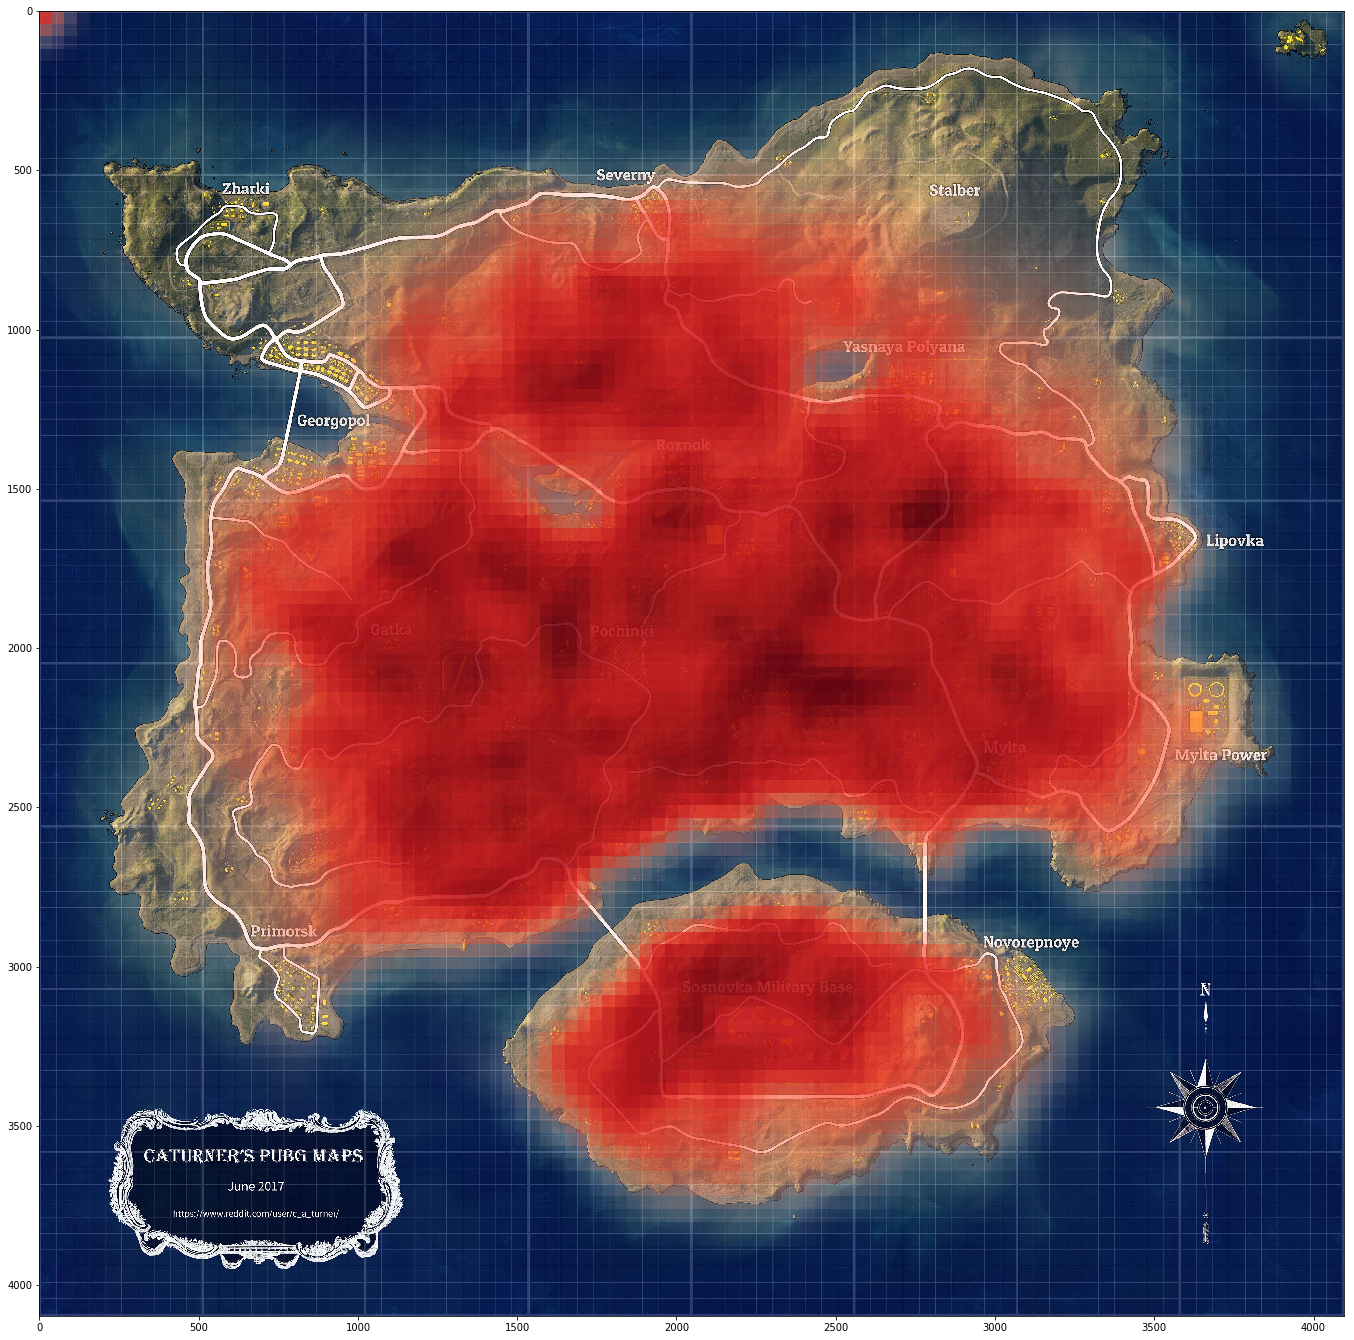

In [78]:
fig, ax = plt.subplots(figsize=(24,24))
ax.set_xlim(0, 4096); ax.set_ylim(0, 4096)
ax.imshow(bg)
ax.imshow(colors, extent=extent, origin='lower', cmap=cm.Reds, alpha=0.9)
plt.gca().invert_yaxis()
plt.savefig('era.png')

In [79]:
bg = imageio.imread('miramar.jpg')
hmap, extent = heatmap(plot_data_mr[:,0], plot_data_mr[:,1], 1.5)
alphas = np.clip(Normalize(0, hmap.max(), clip=True)(hmap)*1.5, 0.0, 1.)
colors = Normalize(0, hmap.max(), clip=True)(hmap)
colors = cm.Blues(colors)
colors[..., -1] = alphas

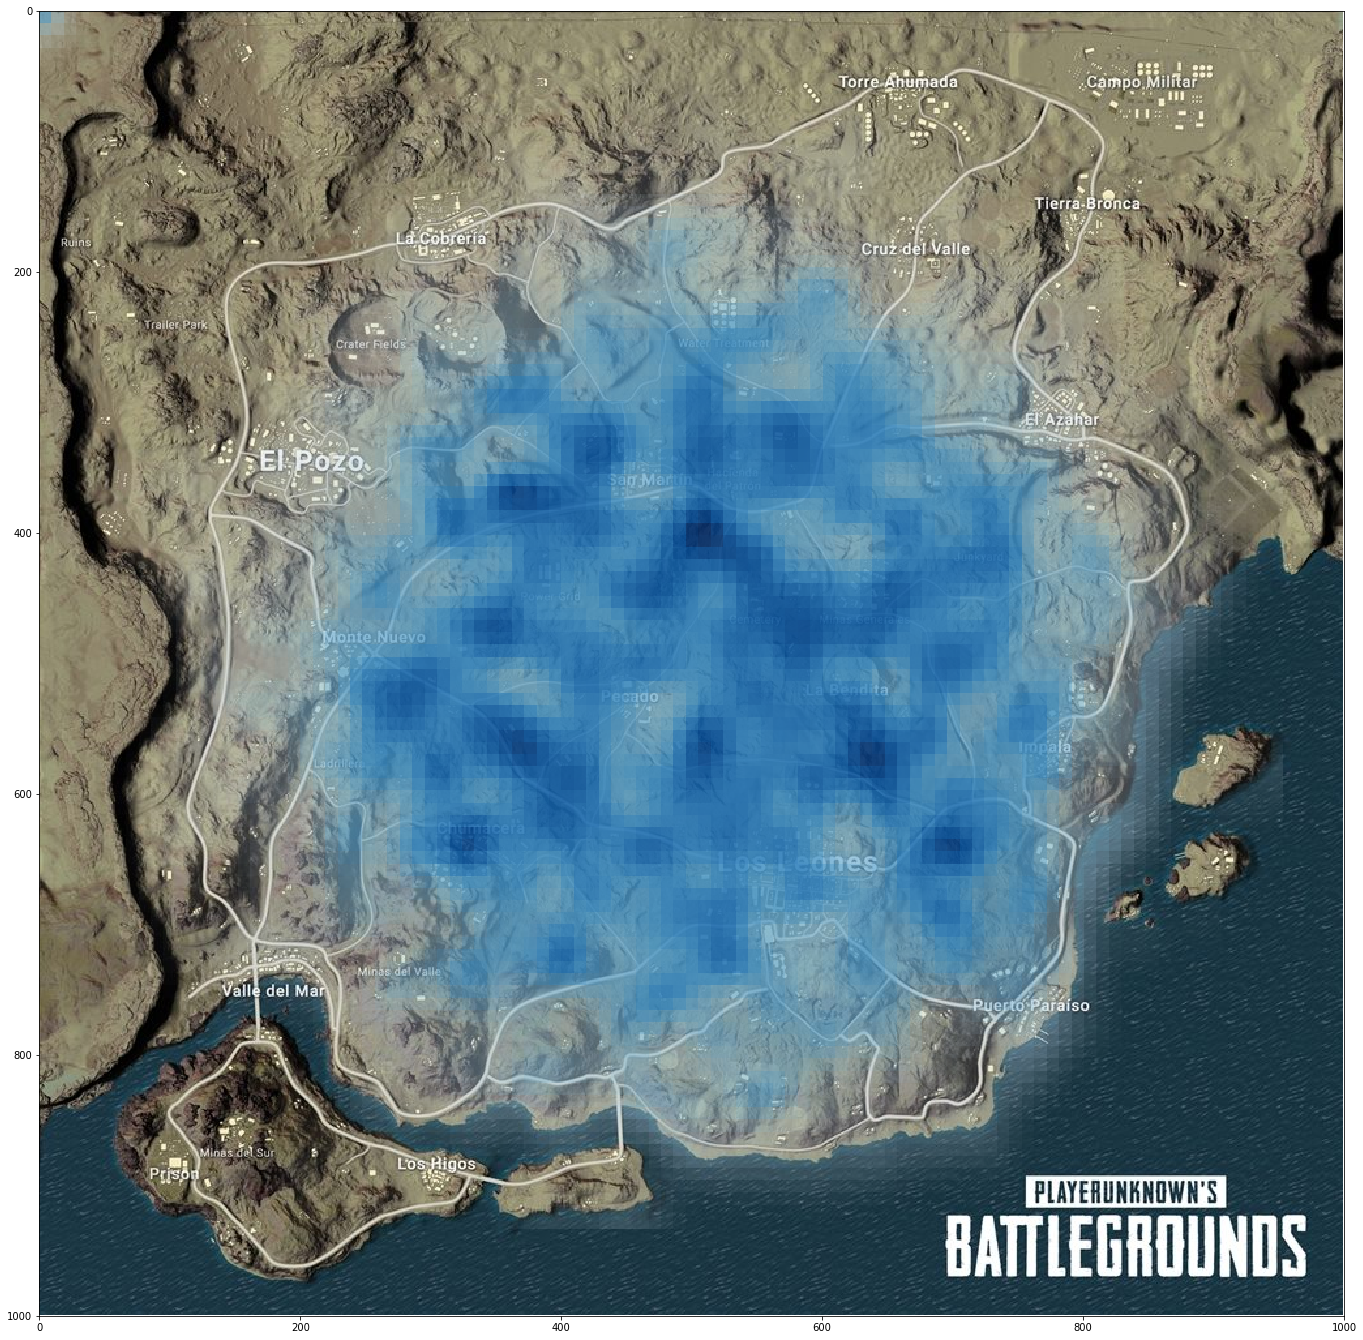

In [80]:
fig, ax = plt.subplots(figsize=(24,24))     
ax.set_xlim(0, 1000); ax.set_ylim(0, 1000)
ax.imshow(bg)
ax.imshow(colors, extent=extent, origin='lower', cmap=cm.Blues, alpha=0.9)
#plt.scatter(plot_data_mr[:,0], plot_data_mr[:,1])
plt.gca().invert_yaxis()
plt.savefig('mir.png')

# Heat map to see where the last circle could be
### We use the second place player's death position to define where the last circle could be.
### We only use solo matches data here, because in duo and squad there are multiple second place death position

### Because the picture is too large and cannot fit properly in the screen so we uploaded them
### Original erangel map : http://personal.psu.edu/hkh5094/DS330/Finalproject/erangel.jpg
### Original miramar map: http://personal.psu.edu/hkh5094/DS330/Finalproject/miramar.jpg
### erangel heat map: http://personal.psu.edu/hkh5094/DS330/Finalproject/era.png
### miramar heat map: http://personal.psu.edu/hkh5094/DS330/Finalproject/mir.png